<CENTER><img src="../../images/ATLASOD.gif" style="width:50%"></CENTER>

# How to rediscover the Higgs boson yourself!
This notebook uses ATLAS Open Data http://opendata.atlas.cern to show you the steps to rediscover the Higgs boson yourself!

ATLAS Open Data provides open access to proton-proton collision data at the LHC for educational purposes. ATLAS Open Data resources are ideal for high-school, undergraduate and postgraduate students.

Notebooks are web applications that allow you to create and share documents that can contain for example:
1. live code
2. visualisations
3. narrative text

This analysis loosely follows the discovery of the Higgs boson by ATLAS https://arxiv.org/pdf/1207.7214.pdf (mostly Section 5 and 5.1)

By the end of this notebook you will be able to:
1. rediscover the Higgs boson yourself!
2. know some general principles of a particle physics analysis

Feynman diagram pictures are borrowed from our friends at https://www.particlezoo.net

<CENTER><img src="images/feynman_diagrams/Hyy_feynman.png" style="width:40%"></CENTER>

<a id='contents'></a>

Contents: 

[Running a Jupyter notebook](#running) <br />
[First time setup on your computer (no need on mybinder)](#setup_computer) <br />
[To setup everytime](#setup_everytime) <br />
[Lumi, fraction, file path](#fraction) <br />
[Samples](#samples) <br />
[Changing a cut](#changing_cut) <br />
[Applying a cut](#applying_cut) <br />
[Plotting](#plotting) <br />
[What can you do to explore this analysis?](#going_further) <br />

<a id='running'></a>

## Running a Jupyter notebook

To run the whole Jupyter notebook, in the top menu click Cell -> Run All.

To propagate a change you've made to a piece of code, click Cell -> Run All Below.

You can also run a single code cell, by clicking Cell -> Run Cells, or using the keyboard shortcut Shift+Enter.

<a id='setup_computer'></a>

## First time setup on your computer (no need on mybinder)
This first cell only needs to be run the first time you open this notebook on your computer. 

If you close Jupyter and re-open on the same computer, you won't need to run this first cell again.

If you open on binder, you don't need to run this cell.

In [3]:
#import sys
#!{sys.executable} -m pip install --upgrade --user pip # update the pip package installer
#!{sys.executable} -m pip install -U numpy==2.0.0 pandas==2.2.2 uproot==5.3.9 matplotlib==3.9.0 lmfit==1.3.1 awkward-pandas==2023.8.0 aiohttp==3.9.5 requests==2.32.3 --user # install required packages

[Back to contents](#contents)

<a id='setup_everytime'></a>

## To setup everytime
Cell -> Run All Below

to be done every time you re-open this notebook

We're going to be using a number of tools to help us:
* uproot: lets us read .root files typically used in particle physics into data formats used in python
* pandas: lets us store data as dataframes, a format widely used in python
* numpy: provides numerical calculations such as histogramming
* matplotlib: common tool for making plots, figures, images, visualisations
* lmfit: tool for statistical fitting

In [4]:
#!pip install lmfit

In [5]:
#!pip install awkward-pandas

In [6]:
import uproot # for reading .root files
import pandas as pd # to store data as dataframea
import time # to measure time to analyse
import math # for mathematical functions such as square root
import numpy as np # # for numerical calculations such as histogramming
import matplotlib.pyplot as plt # for plotting
from matplotlib.ticker import MaxNLocator,AutoMinorLocator # for minor ticks;
from lmfit.models import PolynomialModel, GaussianModel # for the signal and background fits
import requests # for HTTP access
import aiohttp # HTTP client support

### check tree content of old and new

In [7]:
# old file
pnameo = 'https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/GamGam/Data/'+'data_A'+".GamGam.root"

treeo = uproot.open(pnameo+':mini')

treeo.keys()

['runNumber',
 'eventNumber',
 'channelNumber',
 'mcWeight',
 'scaleFactor_PILEUP',
 'scaleFactor_ELE',
 'scaleFactor_MUON',
 'scaleFactor_PHOTON',
 'scaleFactor_TAU',
 'scaleFactor_BTAG',
 'scaleFactor_LepTRIGGER',
 'scaleFactor_PhotonTRIGGER',
 'trigE',
 'trigM',
 'trigP',
 'lep_n',
 'lep_truthMatched',
 'lep_trigMatched',
 'lep_pt',
 'lep_eta',
 'lep_phi',
 'lep_E',
 'lep_z0',
 'lep_charge',
 'lep_type',
 'lep_isTightID',
 'lep_ptcone30',
 'lep_etcone20',
 'lep_trackd0pvunbiased',
 'lep_tracksigd0pvunbiased',
 'met_et',
 'met_phi',
 'jet_n',
 'jet_pt',
 'jet_eta',
 'jet_phi',
 'jet_E',
 'jet_jvt',
 'jet_trueflav',
 'jet_truthMatched',
 'jet_MV2c10',
 'photon_n',
 'photon_truthMatched',
 'photon_trigMatched',
 'photon_pt',
 'photon_eta',
 'photon_phi',
 'photon_E',
 'photon_isTightID',
 'photon_ptcone30',
 'photon_etcone20',
 'photon_convType',
 'tau_n',
 'tau_pt',
 'tau_eta',
 'tau_phi',
 'tau_E',
 'tau_isTightID',
 'tau_truthMatched',
 'tau_trigMatched',
 'tau_nTracks',
 'tau_BDTid

In [8]:
# new file
pname = '/project/etp1/dkoch/ATLASOpenData/ntuples-data-samples/data15_allyear.root'
pname = '/project/etp1/dkoch/ATLASOpenData/ntuples-data-samples/data16_allyear_G.root'
tree = uproot.open(pname+':analysis')

print(tree.num_entries)

tree.keys()

108492747


['ScaleFactor_PILEUP',
 'mcWeight',
 'xsec',
 'trigE',
 'trigM',
 'ScaleFactor_BTAG',
 'jet_n',
 'jet_pt',
 'jet_eta',
 'jet_phi',
 'jet_e',
 'jet_DL1d77_isBtagged',
 'jet_jvt',
 'largeRJet_n',
 'largeRJet_pt',
 'largeRJet_eta',
 'largeRJet_phi',
 'largeRJet_e',
 'largeRJet_m',
 'largeRJet_D2',
 'ScaleFactor_ELE',
 'ScaleFactor_MUON',
 'lep_n',
 'lep_type',
 'lep_pt',
 'lep_eta',
 'lep_phi',
 'lep_e',
 'lep_charge',
 'lep_ptvarcone30',
 'lep_topoetcone20',
 'lep_z0',
 'lep_d0',
 'lep_d0sig',
 'lep_isTight',
 'lep_isTightID',
 'lep_isTightIso',
 'ScaleFactor_PHOTON',
 'photon_n',
 'photon_pt',
 'photon_eta',
 'photon_phi',
 'photon_e',
 'photon_ptcone20',
 'photon_topoetcone40',
 'photon_isTight',
 'photon_isTightID',
 'photon_isTightIso',
 'ScaleFactor_TAU',
 'tau_n',
 'tau_pt',
 'tau_eta',
 'tau_phi',
 'tau_e',
 'tau_charge',
 'tau_nTracks',
 'tau_isTight',
 'tau_RNNJetScore',
 'tau_RNNEleScore',
 'met',
 'met_phi',
 'met_mpx',
 'met_mpy']

In [9]:
import uproot

# Define the path to the directory and the list of samples
tuple_path = "/project/etp1/dkoch/ATLASOpenData/ntuples-data-samples/"
tuple_path = "/project/etp1/dkoch/ATLASOpenData/GamGam/Data/"



samples_list = ['data15_allyear', 'data16_allyear_A', 'data16_allyear_B', 
                'data16_allyear_C', 'data16_allyear_D', 'data16_allyear_E', 
                'data16_allyear_F', 'data16_allyear_G', 'data16_allyear_H']


samples_list = [
    'data15_periodD', 'data15_periodG', 'data16_periodA', 'data16_periodD', 'data16_periodG', 'data16_periodL',
    'data15_periodE', 'data15_periodH', 'data16_periodB', 'data16_periodE', 'data16_PeriodI',
    'data15_periodF', 'data15_periodJ', 'data16_periodC', 'data16_periodF', 'data16_periodK'
]



print(samples_list)



# Initialize a variable to store the total number of entries
total_entries = 0

# Iterate through each sample in the list
for sample in samples_list:
    # Construct the full path to the .root file
    pname = f"{tuple_path}{sample}.root"
    
    try:
        # Open the .root file and access the 'analysis' tree
        with uproot.open(pname + ':analysis') as tree:
            # Add the number of entries in the current tree to the total
            total_entries += tree.num_entries
    except Exception as e:
        print(f"Error processing {pname}: {e}")

# Print the total number of entries across all samples
print(f"Total number of entries: {total_entries}")


['data15_periodD', 'data15_periodG', 'data16_periodA', 'data16_periodD', 'data16_periodG', 'data16_periodL', 'data15_periodE', 'data15_periodH', 'data16_periodB', 'data16_periodE', 'data16_PeriodI', 'data15_periodF', 'data15_periodJ', 'data16_periodC', 'data16_periodF', 'data16_periodK']
Total number of entries: 4998873


In [10]:
myt = tree.iterate(["photon_n","photon_pt","photon_eta","photon_phi","photon_e",
                            "photon_isTightID","photon_ptcone20"], # add more variables here if you want to use them
                           library="pd")

In [11]:
data = next(myt)

In [12]:
data = data.query('photon_n>=2')

In [13]:
data.photon_e

0         [229.02407836914062, 38.64955139160156, 18.747...
1         [122.32769012451172, 20.031408309936523, 41.71...
2         [130.7476806640625, 89.93264770507812, 3.57112...
3         [360.9151306152344, 95.04707336425781, 2.48849...
4         [222.09303283691406, 193.30833435058594, 18.90...
                                ...                        
289328               [392.4599304199219, 332.6964111328125]
289329    [403.9837341308594, 76.38861083984375, 3.76420...
289330    [157.62704467773438, 110.63433837890625, 20.11...
289331    [75.14714813232422, 26.708271026611328, 1.9250...
289332    [95.54251098632812, 138.3558349609375, 2.46509...
Name: photon_e, Length: 289333, dtype: awkward

[Back to contents](#contents)

<a id='fraction'></a>

## Lumi, fraction, file path

General definitions of luminosity, fraction of data used, where to access the input files

In [14]:
#lumi = 0.5 # fb-1 # data_A only
#lumi = 1.9 # fb-1 # data_B only
#lumi = 2.9 # fb-1 # data_C only
#lumi = 4.7 # fb-1 # data_D only
lumi = 10 # fb-1 # data_A,data_B,data_C,data_D

fraction = 1 # reduce this is you want the code to run quicker

#tuple_path = "Input/GamGam/Data/" # local 
tuple_path = "/project/etp1/dkoch/ATLASOpenData/ntuples-data-samples/"
tuple_path = "/project/etp1/dkoch/ATLASOpenData/GamGam/Data/"
#tuple_path = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/GamGam/Data/" # web address

<a id='samples'></a>

## Samples

Samples to process

In [15]:
#samples_list = ['data_A','data_B','data_C','data_D'] # add if you want more data
samples_list = ['data15_allyear', 'data16_allyear_A', 'data16_allyear_B', 
                'data16_allyear_C', 'data16_allyear_D', 'data16_allyear_E', 
                'data16_allyear_F', 'data16_allyear_G', 'data16_allyear_H' ]
#samples_list = ['data15_allyear']  
samples_list = [
    'data15_periodD', 'data15_periodG', 'data16_periodA', 'data16_periodD', 'data16_periodG', 'data16_periodL',
    'data15_periodE', 'data15_periodH', 'data16_periodB', 'data16_periodE', 'data16_PeriodI',
    'data15_periodF', 'data15_periodJ', 'data16_periodC', 'data16_periodF', 'data16_periodK'
]

[Back to contents](#contents)

Define function to get data from files

The datasets used in this notebook have already been filtered to include at least 2 photons per event, so that processing is quicker.

In [16]:
def get_data_from_files():

    frames = [] # define empty list to hold data
    for val in samples_list: # loop over each file
        fileString = tuple_path+val+".root" # file name to open
        temp = read_file_new(fileString) # call the function read_file defined below
        frames.append(temp) # append dataframe returned from read_file to list of dataframes
    data = pd.concat(frames) # concatenate list of dataframes together into one dataframe
    
    return data # return dataframe

Define function to calculate diphoton invariant mass

In [17]:
def calc_myy(photon_pt,photon_eta,photon_phi,photon_E):
    # first photon is [0], 2nd photon is [1] etc
    px_0 = photon_pt[0]*math.cos(photon_phi[0]) # x-component of photon[0] momentum
    py_0 = photon_pt[0]*math.sin(photon_phi[0]) # y-component of photon[0] momentum
    pz_0 = photon_pt[0]*math.sinh(photon_eta[0]) # z-component of photon[0] momentum
    px_1 = photon_pt[1]*math.cos(photon_phi[1]) # x-component of photon[1] momentum
    py_1 = photon_pt[1]*math.sin(photon_phi[1]) # y-component of photon[1] momentum
    pz_1 = photon_pt[1]*math.sinh(photon_eta[1]) # z-component of photon[1] momentum
    sumpx = px_0 + px_1 # x-component of diphoton momentum
    sumpy = py_0 + py_1 # y-component of diphoton momentum
    sumpz = pz_0 + pz_1 # z-component of diphoton momentum 
    sump = math.sqrt(sumpx**2 + sumpy**2 + sumpz**2) # magnitude of diphoton momentum 
    sumE = photon_E[0] + photon_E[1] # energy of diphoton system
    m2 = sumE**2 - sump**2
    if m2>0.:
        m = m2**0.5
    else:
        print('calc_myy error neg mass**2', m2)
        m = 0.
    return m 

[Back to contents](#contents)

<a id='changing_cut'></a>

## Changing a cut

If you change a cut: Cell -> Run All Below

If you change a cut here, you also need to make sure the cut is applied in the "[Applying a cut](#applying_cut)" cell.

In [18]:
#import pandas as pd


# Cut on photon reconstruction quality
# paper: "Photon candidates are required to pass identification criteria"
def cut_photon_reconstruction(photon_isTightID):
# isTightID==True means a photon identified as being well reconstructed
# want to keep events where True for both photons
# first photon is [0], 2nd photon is [1] etc
    return photon_isTightID[0]==True and photon_isTightID[1]==True

# Cut on Transverse momentum
# paper: "The leading (sub-leading) photon candidate is required to have ET > 40 GeV (30 GeV)"

def cut_photon_pt(photon_pt):
# want to keep events where photon_pt[0]>40000 MeV and photon_pt[1]>30000 MeV
    return photon_pt[0]>40 and photon_pt[1]>30


# Cut on energy isolation
# paper: "Photon candidates are required to have an isolation transverse energy of less than 4 GeV"
def cut_isolation_et(photon_ptcone20):
# want to keep events where isolation eT<4000 MeV
    return photon_ptcone20[0]<4 and photon_ptcone20[1]<4

# Cut on pseudorapidity in barrel/end-cap transition region
# paper: "excluding the calorimeter barrel/end-cap transition region 1.37 < |η| < 1.52"
def cut_photon_eta_transition(photon_eta):
# want to keep events where modulus of photon_eta is outside the range 1.37 to 1.52
    return (abs(photon_eta[0])>1.52 or abs(photon_eta[0])<1.37) and (abs(photon_eta[1])>1.52 or abs(photon_eta[1])<1.37)

def cut_n_photon(photon_n):
# >=2
    return photon_n>=2


[Back to contents](#contents)

<a id='applying_cut'></a>

## Applying a cut 

If you add a cut: Cell -> Run All Below

In [19]:
#pname = '/project/etp1/dkoch/ATLASOpenData/ntuples-data-samples/data15_allyear.root'
#tree = uproot.open(pname+':analysis')
def read_file_new(path):
    start = time.time() # start the clock
    print("Processing: "+path) # print which sample is being processed
    data_all = pd.DataFrame() # define empty pandas DataFrame to hold all data for this sample
    tree = uproot.open(path + ":analysis")
    numevents = tree.num_entries # number of events
    for data in tree.iterate(["photon_n","photon_pt","photon_eta","photon_phi","photon_e",
                            "photon_isTightID","photon_ptcone20"], # add more variables here if you want to use them
                           library="pd", # choose output type as pandas DataFrame
                           entry_stop=numevents*fraction): # process up to numevents*fraction

        nIn = len(data.index) # number of events in this batch
        print("before cut ",len(data.index))
        # Cut on # photons
        data = data[ np.vectorize(cut_n_photon)(data.photon_n)]
        print("nphot-cut ",len(data.index))

        # Cut on photon reconstruction quality using the function cut_photon_reconstruction defined above
        data = data[ np.vectorize(cut_photon_reconstruction)(data.photon_isTightID)]
        
        print("istight-cut ",len(data.index))
        
        # Cut on transverse momentum of the photons using the function cut_photon_pt defined above
        data = data[ np.vectorize(cut_photon_pt)(data.photon_pt)]
        print("pt-cut ",len(data.index))
        
        # Cut on energy isolation using the function cut_isolation_et defined above
        data = data[ np.vectorize(cut_isolation_et)(data.photon_ptcone20)]
        print("isol-cut ",len(data.index))
        
        # Cut on pseudorapidity inside barrel/end-cap transition region using the function cut_photon_eta_transition
        data = data[ np.vectorize(cut_photon_eta_transition)(data.photon_eta)]
        print("eta-cut ",len(data.index))
        
        # Calculate reconstructed diphoton invariant mass using the function calc_myy defined above
        data['myy'] = np.vectorize(calc_myy)(data.photon_pt,data.photon_eta,data.photon_phi,data.photon_e)
        
        # dataframe contents can be printed at any stage like this
        #print(data)

        # dataframe column can be printed at any stage like this
        #print(data['photon_pt'])

        # multiple dataframe columns can be printed at any stage like this
        #print(data[['photon_pt','photon_eta']])

        nOut = len(data.index) # number of events passing cuts in this batch
        data_all = pd.concat([data_all, data], ignore_index=True)
        elapsed = time.time() - start # time taken to process
        print("\t nIn: "+str(nIn)+",\t nOut: \t"+str(nOut)+"\t in "+str(round(elapsed,1))+"s") # events before and after
    
    return data_all # return dataframe containing events passing all cuts

[Back to contents](#contents)

This is where the processing happens (this will take some minutes)

In [20]:
#pname = '/project/etp1/dkoch/ATLASOpenData/ntuples-data-samples/data15_allyear.root'
start = time.time() # time at start of whole processing
data = get_data_from_files() # process all files
#data = read_file_new(pname) #
elapsed = time.time() - start # time after whole processing
print("Time taken: "+str(round(elapsed,1))+"s") # print total time taken to process every file

Processing: /project/etp1/dkoch/ATLASOpenData/GamGam/Data/data15_periodD.root
before cut  11371
nphot-cut  11371
istight-cut  1103
pt-cut  512
isol-cut  295
eta-cut  294
	 nIn: 11371,	 nOut: 	294	 in 0.2s
Processing: /project/etp1/dkoch/ATLASOpenData/GamGam/Data/data15_periodG.root
before cut  164583
nphot-cut  164583
istight-cut  16422
pt-cut  8018
isol-cut  4819
eta-cut  4782
	 nIn: 164583,	 nOut: 	4782	 in 1.4s
Processing: /project/etp1/dkoch/ATLASOpenData/GamGam/Data/data16_periodA.root
before cut  108353
nphot-cut  108353
istight-cut  10070
pt-cut  5630
isol-cut  3359
eta-cut  3343
	 nIn: 108353,	 nOut: 	3343	 in 1.2s
Processing: /project/etp1/dkoch/ATLASOpenData/GamGam/Data/data16_periodD.root
before cut  588911
nphot-cut  588911
istight-cut  57411
pt-cut  31509
isol-cut  19253
eta-cut  19151
calc_myy error neg mass**2 -0.005610572945442982
	 nIn: 588911,	 nOut: 	19151	 in 5.0s
Processing: /project/etp1/dkoch/ATLASOpenData/GamGam/Data/data16_periodG.root
before cut  512073
nphot-

<a id='plotting'></a>

## Plotting
If you only want a make a change in the plot: Cell -> Run All Below

Define function to plot the data.

In [31]:
def plot_data(data):   

    xmin = 100 # GeV
    xmax = 160 # GeV
    step_size = 2 # GeV
    
    bin_edges = np.arange(start=xmin, # The interval includes this value
                     stop=xmax+step_size, # The interval doesn't include this value
                     step=step_size ) # Spacing between values
    bin_centres = np.arange(start=xmin+step_size/2, # The interval includes this value
                            stop=xmax+step_size/2, # The interval doesn't include this value
                            step=step_size ) # Spacing between values
    print("bin_centres is: " , bin_centres)

    data_x,_ = np.histogram(data['myy'], 
                            bins=bin_edges ) # histogram the data
    
    #Tuple: (invariant mass , [100,160)) 
    #
    print('data myy is: '  ,  data['myy'])
    print("data_x is: " ,  data_x)
    data_x_errors = np.sqrt( data_x ) # statistical error on the data

    # data fit
    polynomial_mod = PolynomialModel( 4 ) # 4th order polynomial
    gaussian_mod = GaussianModel() # Gaussian
    
    # set initial guesses for the parameters of the polynomial model
    # c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4
    pars = polynomial_mod.guess(data_x, # data to use to guess parameter values
                                x=bin_centres, c0=data_x.max(), c1=20000,
                                c2=1000, c3=0, c4=0 )
    print('data_x.max() is: ',  data_x.max())
    
    # set initial guesses for the parameters of the Gaussian model
    pars += gaussian_mod.guess(data_x, # data to use to guess parameter values
                               x=bin_centres, amplitude=100, 
                               center=125, sigma=2 )
    
    model = polynomial_mod + gaussian_mod # combined model
    
    # fit the model to the data
    out = model.fit(data_x, # data to be fit
                    pars, # guesses for the parameters
                    x=bin_centres, weights= 1/data_x_errors ) 

    # background part of fit
    params_dict = out.params.valuesdict() # get the parameters from the fit to data
    c0 = params_dict['c0'] # c0 of c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4
    c1 = params_dict['c1'] # c1 of c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4
    c2 = params_dict['c2'] # c2 of c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4
    c3 = params_dict['c3'] # c3 of c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4
    c4 = params_dict['c4'] # c4 of c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4
    
    # get the background only part of the fit to data
    background = c0 + c1*bin_centres + c2*bin_centres**2 + c3*bin_centres**3 + c4*bin_centres**4

    # data fit - background fit = signal fit
    
    signal_x = data_x - background 
    print("signal_x is " , signal_x)
    print("data_x is " , data_x)
    print("background " , background)


    # *************
    # Main plot 
    # *************
    plt.axes([0.1,0.3,0.85,0.65]) # left, bottom, width, height 
    main_axes = plt.gca() # get current axes
    
    # plot the data points
    main_axes.errorbar(x=bin_centres, y=data_x, yerr=data_x_errors, 
                       fmt='ko', # 'k' means black and 'o' means circles
                       label='Data' ) 
    
    # plot the signal + background fit
    main_axes.plot(bin_centres, # x
                   out.best_fit, # y
                   '-r', # single red line
                   label='Sig+Bkg Fit ($m_H=125$ GeV)' )
    
    # plot the background only fit
    main_axes.plot(bin_centres, # x
                   background, # y
                   '--r', # dashed red line
                   label='Bkg (4th order polynomial)' )

    # set the x-limit of the main axes
    main_axes.set_xlim( left=xmin, right=xmax ) 
    
    # separation of x-axis minor ticks
    main_axes.xaxis.set_minor_locator( AutoMinorLocator() ) 
    
    # set the axis tick parameters for the main axes
    main_axes.tick_params(which='both', # ticks on both x and y axes
                          direction='in', # Put ticks inside and outside the axes
                          top=True, # draw ticks on the top axis
                          labelbottom=False, # don't draw tick labels on bottom axis
                          right=True ) # draw ticks on right axis
    
    # write y-axis label for main axes
    main_axes.set_ylabel('Events / '+str(step_size)+' GeV', 
                         horizontalalignment='right') 
    
    # set the y-axis limit for the main axes
    main_axes.set_ylim( bottom=0, top=np.amax(data_x)*1.1 ) 
    
    # set minor ticks on the y-axis of the main axes
    main_axes.yaxis.set_minor_locator( AutoMinorLocator() ) 
    
    # avoid displaying y=0 on the main axes
    main_axes.yaxis.get_major_ticks()[0].set_visible(False) 

    # Add text 'ATLAS Open Data' on plot
    plt.text(0.2, # x
             0.92, # y
             'ATLAS Open Data', # text
             transform=main_axes.transAxes, # coordinate system used is that of main_axes
             fontsize=13 ) 
    
    # Add text 'for education' on plot
    plt.text(0.2, # x
             0.86, # y
             'for education', # text
             transform=main_axes.transAxes, # coordinate system used is that of main_axes
             style='italic',
             fontsize=8 ) 
    
    # Add energy and luminosity
    lumi_used = str(lumi*fraction) # luminosity to write on the plot
    plt.text(0.2, # x
             0.8, # y
             '$\sqrt{s}$=13 TeV,$\int$L dt = '+lumi_used+' fb$^{-1}$', # text
             transform=main_axes.transAxes ) # coordinate system used is that of main_axes 
    
    # Add a label for the analysis carried out
    plt.text(0.2, # x
             0.74, # y
             r'$H \rightarrow \gamma\gamma$', # text 
             transform=main_axes.transAxes ) # coordinate system used is that of main_axes

    # draw the legend
    main_axes.legend(frameon=False, # no box around the legend
                     loc='lower left' ) # legend location 


    # *************
    # Data-Bkg plot 
    # *************
    plt.axes([0.1,0.1,0.85,0.2]) # left, bottom, width, height
    sub_axes = plt.gca() # get the current axes
    
    # set the y axis to be symmetric about Data-Background=0
    sub_axes.yaxis.set_major_locator( MaxNLocator(nbins='auto', 
                                                  symmetric=True) )
    
    # plot Data-Background
    sub_axes.errorbar(x=bin_centres, y=signal_x, yerr=data_x_errors,
                      fmt='ko' ) # 'k' means black and 'o' means circles
    
    # draw the fit to data
    sub_axes.plot(bin_centres, # x
                  out.best_fit-background, # y
                  '-r' ) # single red line
    
    # draw the background only fit
    sub_axes.plot(bin_centres, # x
                  background-background, # y
                  '--r' )  # dashed red line
    
    # set the x-axis limits on the sub axes
    sub_axes.set_xlim( left=xmin, right=xmax ) 
    
    # separation of x-axis minor ticks
    sub_axes.xaxis.set_minor_locator( AutoMinorLocator() ) 
    
    # x-axis label
    sub_axes.set_xlabel(r'di-photon invariant mass $\mathrm{m_{\gamma\gamma}}$ [GeV]',
                        x=1, horizontalalignment='right', 
                        fontsize=13 ) 
    
    # set the tick parameters for the sub axes
    sub_axes.tick_params(which='both', # ticks on both x and y axes
                         direction='in', # Put ticks inside and outside the axes
                         top=True, # draw ticks on the top axis
                         right=True ) # draw ticks on right axis 
    
    # separation of y-axis minor ticks
    sub_axes.yaxis.set_minor_locator( AutoMinorLocator() ) 
    
    # y-axis label on the sub axes
    sub_axes.set_ylabel( 'Events-Bkg' ) 


    # Generic features for both plots
    main_axes.yaxis.set_label_coords( -0.09, 1 ) # x,y coordinates of the y-axis label on the main axes
    sub_axes.yaxis.set_label_coords( -0.09, 0.5 ) # x,y coordinates of the y-axis label on the sub axes
    
    return

In [32]:
data['myy'] #invriant masses

0        109.939896
1        233.445730
2         91.226625
3         86.394939
4        886.321497
           ...     
9088    1260.289782
9089     203.087120
9090      25.090452
9091      82.572908
9092      89.274699
Name: myy, Length: 156974, dtype: float64

[Back to contents](#contents)

Call the function to plot the data

bin_centres is:  [101. 103. 105. 107. 109. 111. 113. 115. 117. 119. 121. 123. 125. 127.
 129. 131. 133. 135. 137. 139. 141. 143. 145. 147. 149. 151. 153. 155.
 157. 159.]
data myy is:  0        109.939896
1        233.445730
2         91.226625
3         86.394939
4        886.321497
           ...     
9088    1260.289782
9089     203.087120
9090      25.090452
9091      82.572908
9092      89.274699
Name: myy, Length: 156974, dtype: float64
data_x is:  [1634 1501 1351 1291 1306 1188 1260 1184 1134 1150 1101 1129 1101 1113
 1098 1036 1080 1002 1029 1006  961 1039 1056  934  994  956  991  889
  871  936]
data_x.max() is:  1634
signal_x is  [ 52.2197536   16.85093329 -50.02451042 -39.84520846  33.86714179
 -35.49222344  76.38886562  32.73951232   8.70575359  45.35055992
  12.65383539  53.51241764  35.74007788  56.0675209   48.14238507
  -7.4707577   42.70959812 -28.91810841   4.96149536 -10.41928433
 -46.9112077   40.55189861  67.95314156 -42.80743835  29.08713297
   3.37076317  50.694

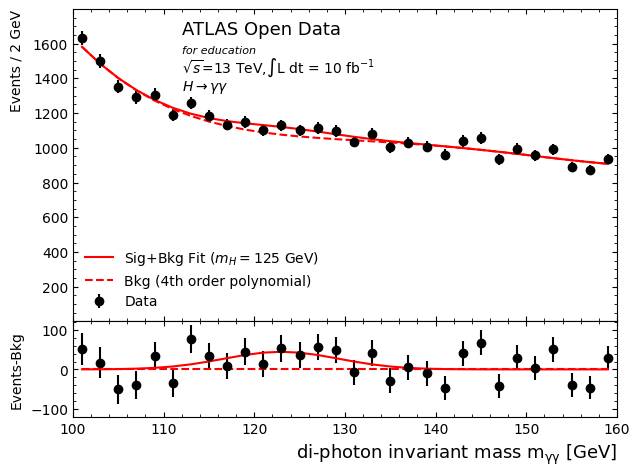

In [33]:
plot_data(data)

[Back to contents](#contents)

<a id='going_further'></a>

## What can you do to explore this analysis?

* Increase the fraction of data used in '[Lumi, fraction, file path](#fraction)'
* Use data_B, data_C and data_D in '[Samples](#samples)'
* Check how many events are being thrown away by each cut in '[Applying a cut](#applying_cut)'
* Add more cuts from the [Higgs discovery paper](https://www.sciencedirect.com/science/article/pii/S037026931200857X#se0090) in '[Changing a cut](#changing_cut)' and '[Applying a cut](#applying_cut)'
* Find the reduced chi-squared for the fit in '[Plotting](#plotting)'
* Find the mean of the fitted Gaussian in '[Plotting](#plotting)'
* Find the width of the fitted Gaussian in '[Plotting](#plotting)'
* Try different initial guesses for the parameters of the fit in '[Plotting](#plotting)'
* Try different functions for the fit in '[Plotting](#plotting)'
* Your idea!

[Back to contents](#contents)

In [24]:
data

,photon_n,photon_pt,photon_eta,photon_phi,photon_e,photon_isTightID,photon_ptcone20,myy
0,2,"[83.00553894042969, 73.86251068115234]","[1.6935840845108032, 1.1597671508789062]","[-0.6130510568618774, 0.7968668341636658]","[233.36172485351562, 129.36094665527344]","[True, True]","[0.0, 0.0]",109.939896
1,3,"[129.38278198242188, 104.05431365966797, 2.080...","[0.7165750861167908, 0.4810837507247925, -0.02...","[2.4825899600982666, -0.747130811214447, -2.29...","[164.04644775390625, 116.32959747314453, 2.081...","[True, True, False]","[0.0, 0.0, 0.0]",233.445730
2,3,"[46.23123550415039, 44.531394958496094, 5.1374...","[-1.9988073110580444, -2.2689366340637207, 0.8...","[0.6090121269226074, -2.7088539600372314, 0.50...","[173.73109436035156, 217.59231567382812, 7.089...","[True, True, False]","[0.0, 0.0, 0.0]",91.226625
3,4,"[42.46541976928711, 37.876243591308594, 2.6686...","[-1.93217933177948, -1.1153863668441772, -1.11...","[-1.1958187818527222, 1.6911739110946655, 1.61...","[149.6772918701172, 63.98310852050781, 4.50784...","[True, True, False, False]","[0.0, 0.0, 0.0, 0.0]",86.394939
4,6,"[448.885009765625, 433.9150695800781, 6.397278...","[0.875586748123169, 1.0576153993606567, 1.0589...","[0.19342122972011566, -2.9577221870422363, -3....","[632.2322387695312, 700.0740966796875, 10.3320...","[True, True, False, False, False, False]","[0.0, 0.0, 297.41998291015625, 297.41998291015...",886.321497
...,...,...,...,...,...,...,...,...
9088,5,"[422.0199890136719, 306.8123779296875, 26.2415...","[-1.1363660097122192, 1.1894625425338745, 0.41...","[2.8372621536254883, -0.5618632435798645, 0.70...","[725.1168212890625, 550.6821899414062, 28.5555...","[True, True, False, False, False]","[0.0, 0.0, 21.463787078857422, 0.0, 0.0]",1260.289782
9089,4,"[155.23533630371094, 77.79113006591797, 11.992...","[1.0118132829666138, 2.002138376235962, 0.8685...","[1.695868730545044, -2.8396735191345215, -1.63...","[241.71255493164062, 293.2694396972656, 16.807...","[True, True, True, False]","[0.0, 0.0, 0.0, 0.0]",203.087120
9090,2,"[146.23138427734375, 47.45795440673828]","[0.050997860729694366, -0.24490845203399658]","[2.3295633792877197, 2.2794454097747803]","[146.4215850830078, 48.88834762573242]","[True, True]","[0.0, 0.0]",25.090452
9091,3,"[99.76640319824219, 40.38347244262695, 1.87070...","[-2.30360746383667, -1.0886610746383667, 0.517...","[-0.965173065662384, -1.1250180006027222, 1.28...","[504.32550048828125, 66.7732925415039, 2.12677...","[True, True, False]","[1.3482112884521484, 0.0, 0.0]",82.572908


In [27]:
def plot_data(data):   
    # Define your range, binning, and calculate the histogram
    xmin = 100 # GeV
    xmax = 160 # GeV
    step_size = 2 # GeV
    
    bin_edges = np.arange(start=xmin, stop=xmax + step_size, step=step_size)
    bin_centres = np.arange(start=xmin + step_size/2, stop=xmax + step_size/2, step=step_size)

    data_x, _ = np.histogram(data['myy'], bins=bin_edges)
    data_x_errors = np.sqrt(data_x)  # Statistical error on the data

    # Define the polynomial and Gaussian models
    polynomial_mod = PolynomialModel(4)  # 4th order polynomial
    gaussian_mod = GaussianModel()

    # Initial parameter guesses
    pars = polynomial_mod.guess(data_x, x=bin_centres, c0=data_x.max(), c1=0, c2=0, c3=0, c4=0)
    pars += gaussian_mod.guess(data_x, x=bin_centres, amplitude=1600, center=125, sigma=2)

    # Combine the models
    model = polynomial_mod + gaussian_mod

    # Fit the model to the data
    out = model.fit(data_x, pars, x=bin_centres, weights=1/data_x_errors)

    # Check if fit was successful
    if out.success:
        print("Fit was successful!")
    else:
        print("Fit failed!")

    # Extract and print fit parameters
    params_dict = out.params.valuesdict()  # Get the fitted parameter values as a dictionary
    for param, value in params_dict.items():
        print(f"{param} = {value}")
    
    # Optional: return the parameters for further use
    return params_dict

    # ... (rest of your plotting code)


bin_centres is:  [101. 103. 105. 107. 109. 111. 113. 115. 117. 119. 121. 123. 125. 127.
 129. 131. 133. 135. 137. 139. 141. 143. 145. 147. 149. 151. 153. 155.
 157. 159.]
data myy is:  0        109.939896
1        233.445730
2         91.226625
3         86.394939
4        886.321497
           ...     
9088    1260.289782
9089     203.087120
9090      25.090452
9091      82.572908
9092      89.274699
Name: myy, Length: 156974, dtype: float64
data_x is:  [1634 1501 1351 1291 1306 1188 1260 1184 1134 1150 1101 1129 1101 1113
 1098 1036 1080 1002 1029 1006  961 1039 1056  934  994  956  991  889
  871  936]
data_x.max() is:  1634
signal_x is  [86242.66506501 86207.29624469 86140.42080098 86150.60010294
 86224.3124532  86154.95308796 86266.83417702 86223.18482372
 86199.15106499 86235.79587132 86203.09914679 86243.95772904
 86226.18538928 86246.5128323  86238.58769647 86182.9745537
 86233.15490952 86161.52720299 86195.40680677 86180.02602707
 86143.5341037  86230.99721002 86258.39845296 8

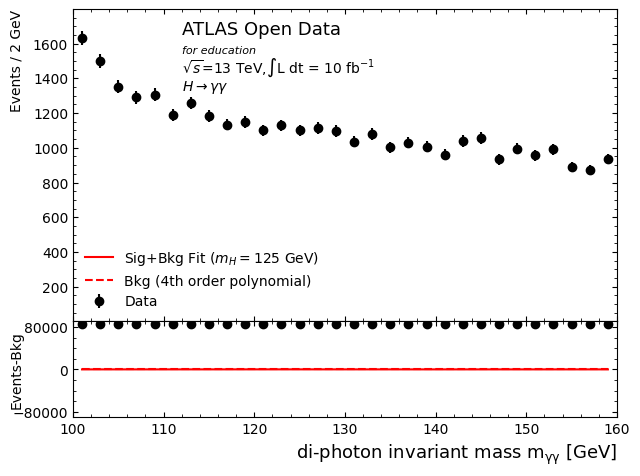

In [34]:
plot_data(data)

bin_centres is:  [101. 103. 105. 107. 109. 111. 113. 115. 117. 119. 121. 123. 125. 127.
 129. 131. 133. 135. 137. 139. 141. 143. 145. 147. 149. 151. 153. 155.
 157. 159.]
data myy is:  0        109.939896
1        233.445730
2         91.226625
3         86.394939
4        886.321497
           ...     
9088    1260.289782
9089     203.087120
9090      25.090452
9091      82.572908
9092      89.274699
Name: myy, Length: 156974, dtype: float64
data_x is:  [1634 1501 1351 1291 1306 1188 1260 1184 1134 1150 1101 1129 1101 1113
 1098 1036 1080 1002 1029 1006  961 1039 1056  934  994  956  991  889
  871  936]
data_x.max() is:  1634
signal_x is  [ 52.2197536   16.85093329 -50.02451042 -39.84520846  33.86714179
 -35.49222344  76.38886562  32.73951232   8.70575359  45.35055992
  12.65383539  53.51241764  35.74007788  56.0675209   48.14238507
  -7.4707577   42.70959812 -28.91810841   4.96149536 -10.41928433
 -46.9112077   40.55189861  67.95314156 -42.80743835  29.08713297
   3.37076317  50.694

TypeError: cannot unpack non-iterable NoneType object

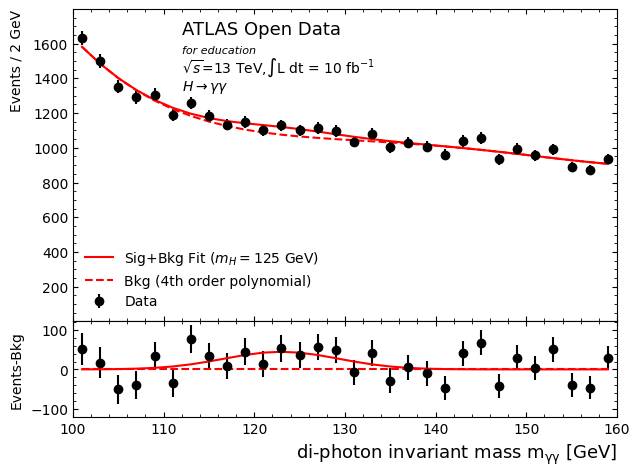

In [35]:
params, out = plot_data(data)
print("Fitted parameters: ", params)
